Prupouse

In [572]:
pd.read_csv("amzn_stock.csv")

Open         High          Low        Close    Volume  Dividends  \
0        2.437500     2.500000     1.927083     1.958333  72156000          0   
1        1.968750     1.979167     1.708333     1.729167  14700000          0   
2        1.760417     1.770833     1.625000     1.708333   6106800          0   
3        1.729167     1.750000     1.635417     1.635417   5467200          0   
4        1.635417     1.645833     1.375000     1.427083  18853200          0   
...           ...          ...          ...          ...       ...        ...   
6264  3354.830078  3362.209961  3265.320068  3281.100098   2686400          0   
6265  3233.010010  3244.000000  3145.090088  3175.120117   3952800          0   
6266  3168.000000  3201.580078  3090.229980  3155.689941   3406800          0   
6267  3135.000000  3147.370117  3084.620117  3089.209961   2295100          0   
6268  3054.260010  3082.729980  3037.139893  3044.330078    752152          0   

      Stock Splits  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
6264           0.0  
6265           0.0  
6266           0.0  
6267           0.0  
6268           0.0  

[6269 rows x 7 columns]

In [573]:
from datetime import datetime, timedelta
from  matplotlib import pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
"""
Ver se cada , tem espaço depois
"""

'\nVer se cada , tem espaço depois\n'

In [574]:
amzn = yf.Ticker("AMZN")

In [575]:
historical_data = amzn.history(period="max")
historical_data

Open         High          Low        Close    Volume  \
Date                                                                       
1997-05-15     2.437500     2.500000     1.927083     1.958333  72156000   
1997-05-16     1.968750     1.979167     1.708333     1.729167  14700000   
1997-05-19     1.760417     1.770833     1.625000     1.708333   6106800   
1997-05-20     1.729167     1.750000     1.635417     1.635417   5467200   
1997-05-21     1.635417     1.645833     1.375000     1.427083  18853200   
...                 ...          ...          ...          ...       ...   
2022-04-05  3354.830078  3362.209961  3265.320068  3281.100098   2686400   
2022-04-06  3233.010010  3244.000000  3145.090088  3175.120117   3952800   
2022-04-07  3168.000000  3201.580078  3090.229980  3155.689941   3406800   
2022-04-08  3135.000000  3147.370117  3084.620117  3089.209961   2295100   
2022-04-11  3054.260010  3082.729980  3018.050049  3027.375000    989983   

            Dividends  Stock Splits  
Date                                 
1997-05-15          0           0.0  
1997-05-16          0           0.0  
1997-05-19          0           0.0  
1997-05-20          0           0.0  
1997-05-21          0           0.0  
...               ...           ...  
2022-04-05          0           0.0  
2022-04-06          0           0.0  
2022-04-07          0           0.0  
2022-04-08          0           0.0  
2022-04-11          0           0.0  

[6269 rows x 7 columns]

In [576]:
historical_data.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [577]:
historical_data.loc[:, "Dividends"].unique()

array([0])

In [578]:
historical_data.loc[:, "Stock Splits"].unique()

array([0., 2., 3.])

In [579]:
historical_data.loc[:, "Stock Splits"][historical_data.loc[:, "Stock Splits"] != 0]
# https://www.nasdaq.com/articles/heres-what-amazons-stock-did-after-its-last-stock-split

Date
1998-06-02    2.0
1999-01-05    3.0
1999-09-02    2.0
Name: Stock Splits, dtype: float64

In [580]:
historical_data = historical_data.iloc[:,:-2]
historical_data["date"] = historical_data.index
historical_data

Open         High          Low        Close    Volume  \
Date                                                                       
1997-05-15     2.437500     2.500000     1.927083     1.958333  72156000   
1997-05-16     1.968750     1.979167     1.708333     1.729167  14700000   
1997-05-19     1.760417     1.770833     1.625000     1.708333   6106800   
1997-05-20     1.729167     1.750000     1.635417     1.635417   5467200   
1997-05-21     1.635417     1.645833     1.375000     1.427083  18853200   
...                 ...          ...          ...          ...       ...   
2022-04-05  3354.830078  3362.209961  3265.320068  3281.100098   2686400   
2022-04-06  3233.010010  3244.000000  3145.090088  3175.120117   3952800   
2022-04-07  3168.000000  3201.580078  3090.229980  3155.689941   3406800   
2022-04-08  3135.000000  3147.370117  3084.620117  3089.209961   2295100   
2022-04-11  3054.260010  3082.729980  3018.050049  3027.375000    989983   

                 date  
Date                   
1997-05-15 1997-05-15  
1997-05-16 1997-05-16  
1997-05-19 1997-05-19  
1997-05-20 1997-05-20  
1997-05-21 1997-05-21  
...               ...  
2022-04-05 2022-04-05  
2022-04-06 2022-04-06  
2022-04-07 2022-04-07  
2022-04-08 2022-04-08  
2022-04-11 2022-04-11  

[6269 rows x 6 columns]

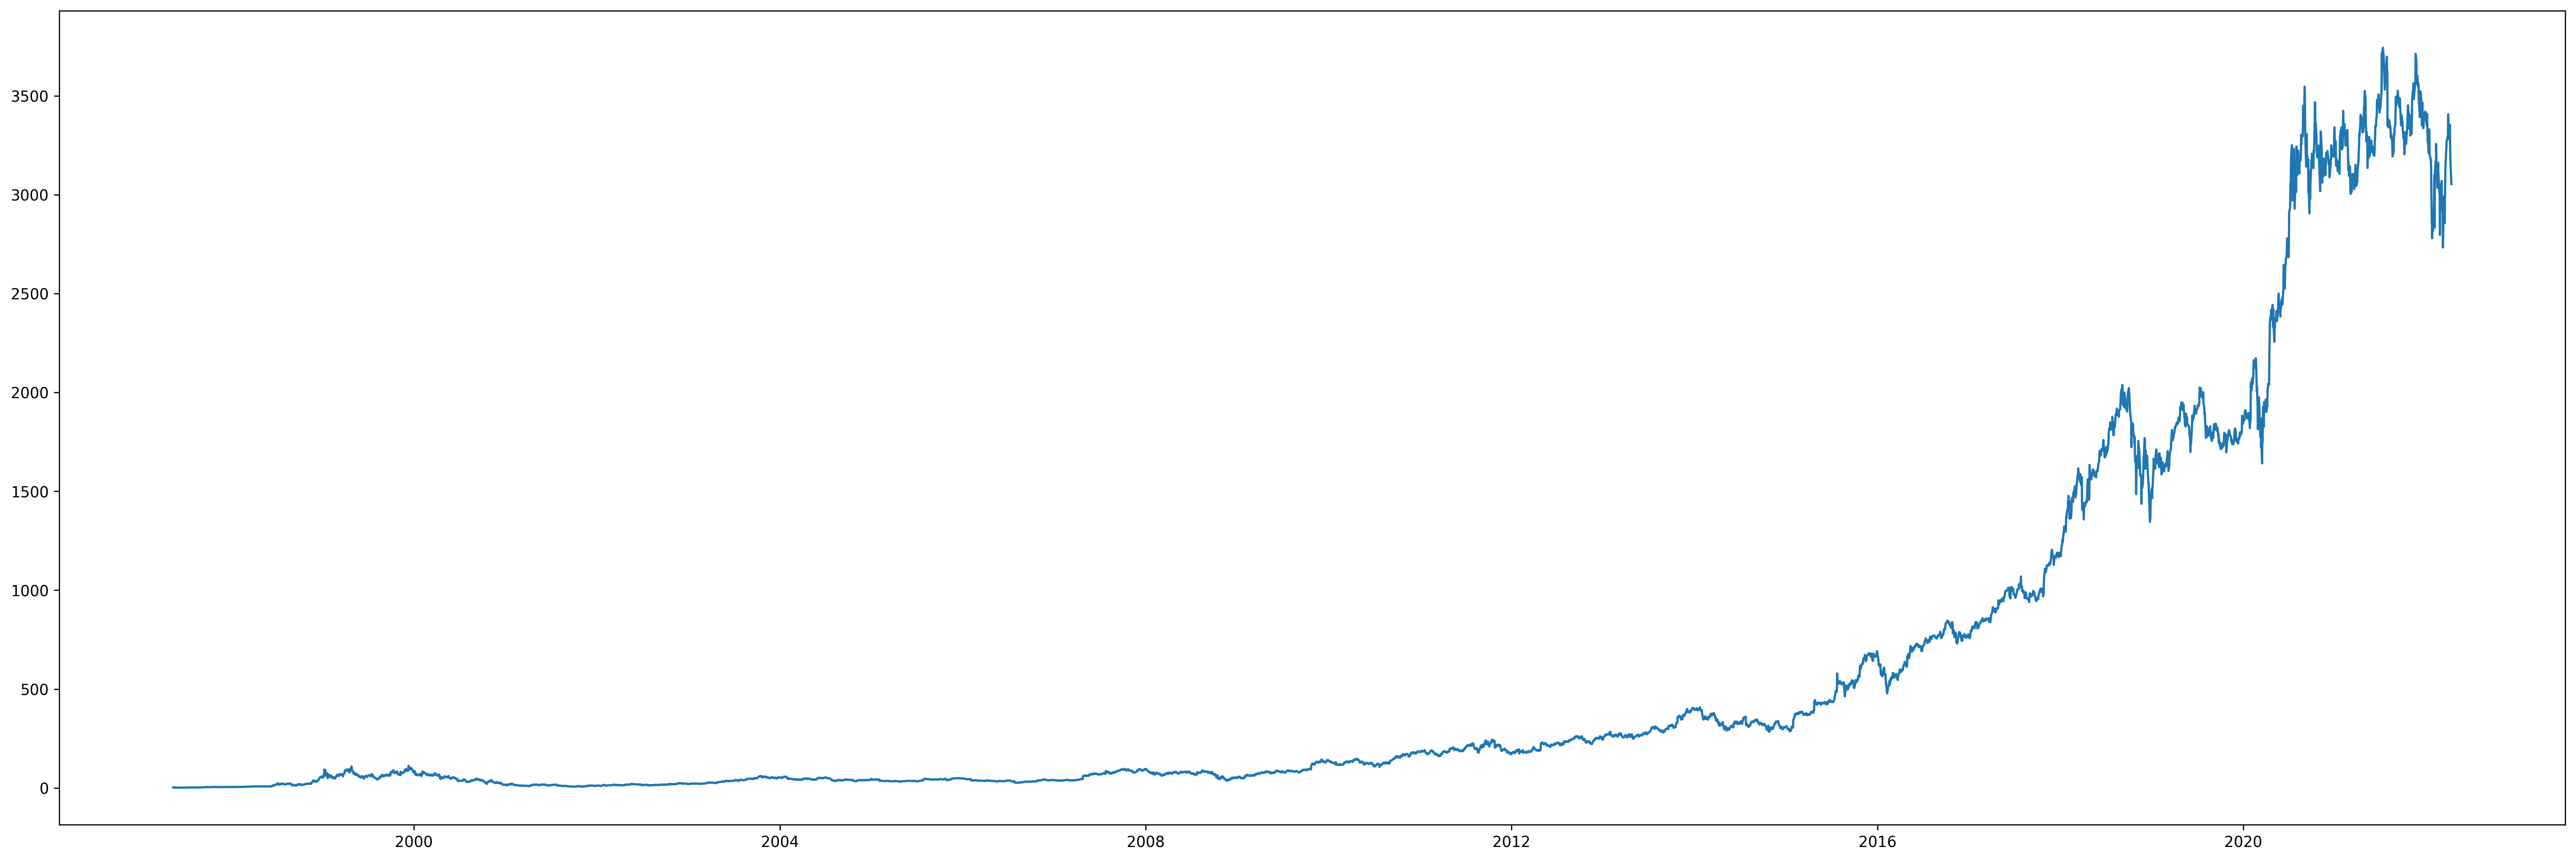

In [581]:
plt.rcParams["figure.figsize"] = (30,10)
x = historical_data.index
y = historical_data.loc[:,"Open"]
plt.plot(x, y)
plt.show()

In [582]:
monthly_historical_data = historical_data.groupby([historical_data.index.year, historical_data.index.month]).first()
monthly_historical_data

Open         High          Low        Close    Volume  \
Date Date                                                                 
1997 5        2.437500     2.500000     1.927083     1.958333  72156000   
     6        1.510417     1.531250     1.500000     1.510417    591600   
     7        1.541667     1.541667     1.510417     1.515625   1292400   
     8        2.343750     2.416667     2.250000     2.416667   3588000   
     9        2.343750     2.375000     2.333333     2.354167    732000   
...                ...          ...          ...          ...       ...   
2021 12    3545.000000  3559.879883  3441.600098  3443.719971   3745800   
2022 1     3351.000000  3414.070068  3323.209961  3408.090088   3176000   
     2     3000.000000  3034.159912  2952.550049  3023.870117   2961000   
     3     3054.649902  3081.979980  2999.540039  3022.840088   2243700   
     4     3282.989990  3316.540039  3246.389893  3271.199951   2851800   

                date  
Date Date             
1997 5    1997-05-15  
     6    1997-06-02  
     7    1997-07-01  
     8    1997-08-01  
     9    1997-09-02  
...              ...  
2021 12   2021-12-01  
2022 1    2022-01-03  
     2    2022-02-01  
     3    2022-03-01  
     4    2022-04-01  

[300 rows x 6 columns]

In [583]:
monthly_historical_data.set_index("date", inplace=True)
monthly_historical_data

Open         High          Low        Close    Volume
date                                                                    
1997-05-15     2.437500     2.500000     1.927083     1.958333  72156000
1997-06-02     1.510417     1.531250     1.500000     1.510417    591600
1997-07-01     1.541667     1.541667     1.510417     1.515625   1292400
1997-08-01     2.343750     2.416667     2.250000     2.416667   3588000
1997-09-02     2.343750     2.375000     2.333333     2.354167    732000
...                 ...          ...          ...          ...       ...
2021-12-01  3545.000000  3559.879883  3441.600098  3443.719971   3745800
2022-01-03  3351.000000  3414.070068  3323.209961  3408.090088   3176000
2022-02-01  3000.000000  3034.159912  2952.550049  3023.870117   2961000
2022-03-01  3054.649902  3081.979980  2999.540039  3022.840088   2243700
2022-04-01  3282.989990  3316.540039  3246.389893  3271.199951   2851800

[300 rows x 5 columns]

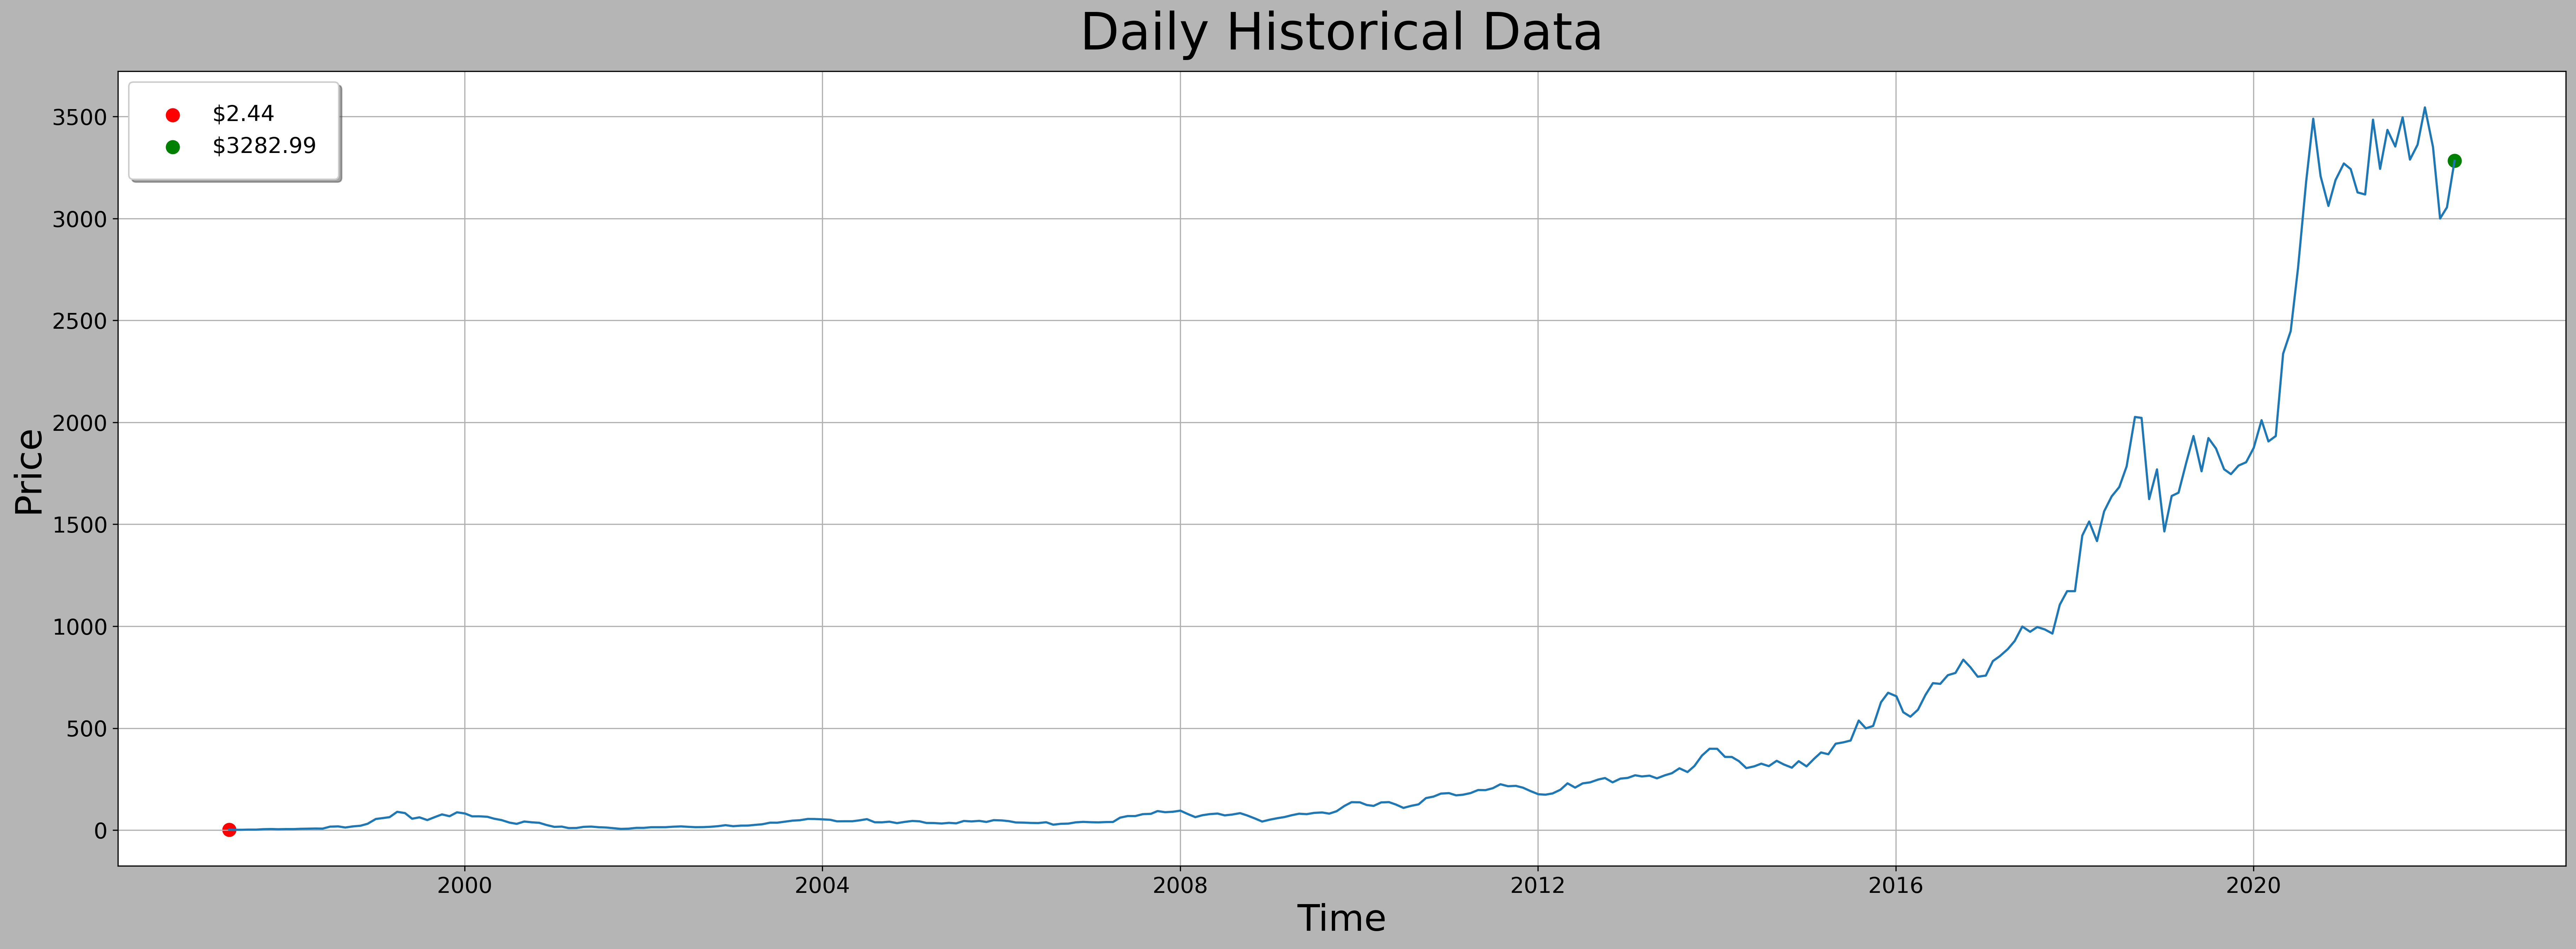

In [584]:
plt.rcParams["figure.figsize"] = (30,10)
x = monthly_historical_data.index
y = monthly_historical_data.loc[:,"Open"]
fig, ax = plt.subplots()
fig.patch.set_facecolor('#b5b5b5')
plt.scatter(x[0], y[0], color="r", label=f"${y[0]:.2f}", s=75)
ax.legend(loc="upper left", fontsize=15, shadow=True, borderpad=1)
plt.scatter(x[-1], y[-1], color="g", label=f"${y[-1]:.2f}", s=75)
ax.legend(loc="upper left", fontsize=15, shadow=True, borderpad=1)
plt.title("Daily Historical Data", size=35, pad=15)
plt.xlabel("Time", size=25)
plt.ylabel("Price", size=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.plot(x, y)
plt.show()

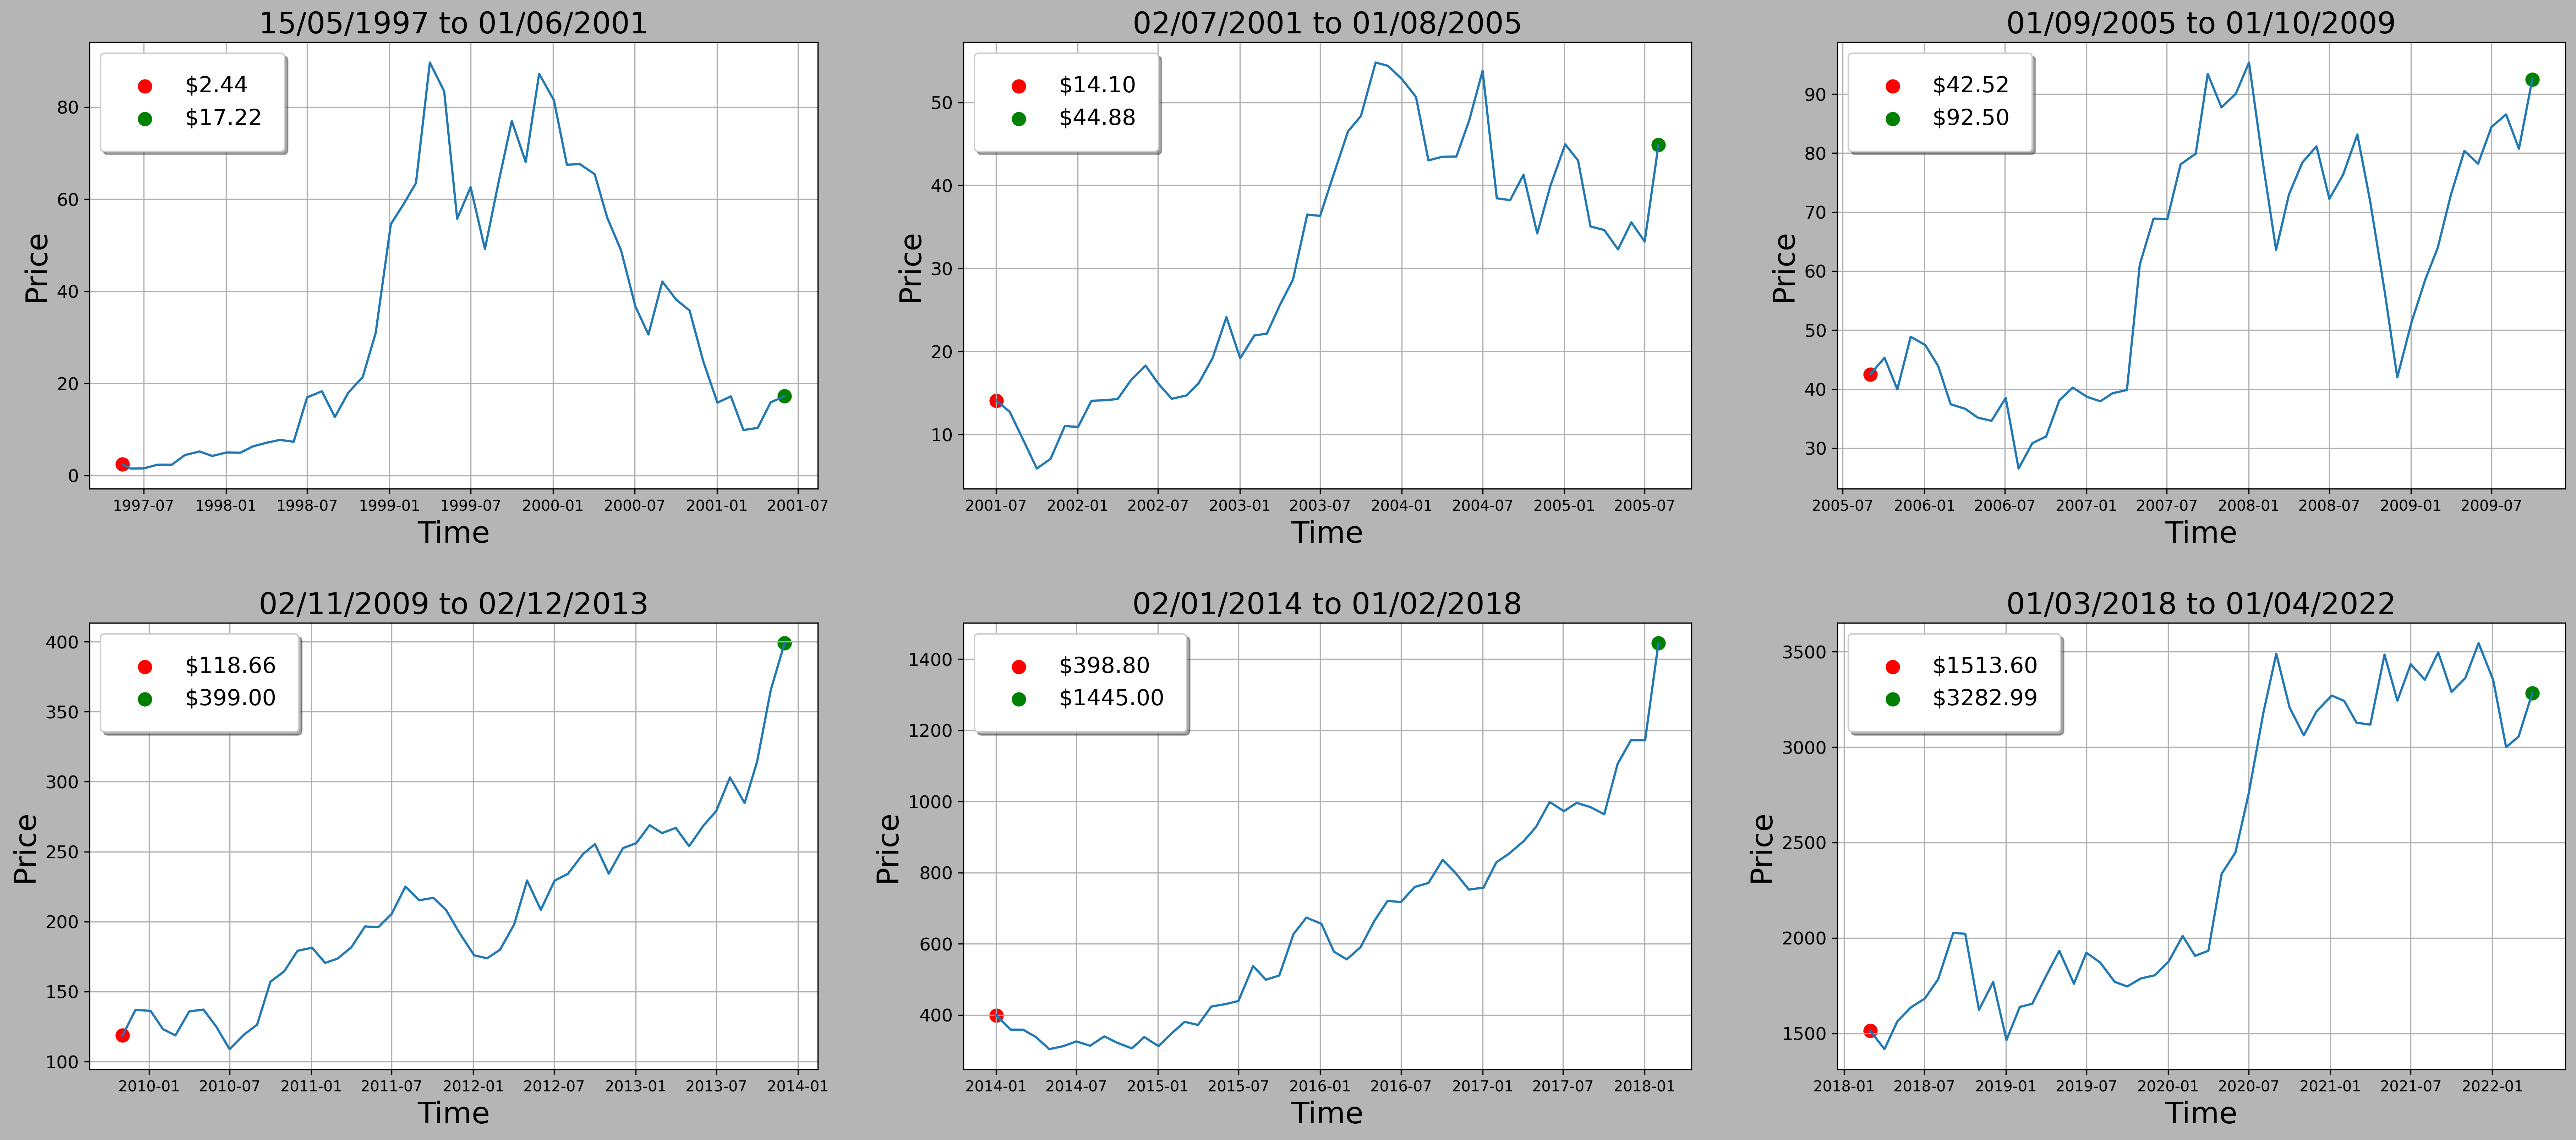

In [585]:
splitted_data = np.array_split(monthly_historical_data["Open"], 6)

plt.rcParams["figure.figsize"] = (30,20)

fig, ax = plt.subplots()

fig.patch.set_facecolor('#b5b5b5')

for i, v in enumerate(splitted_data):
    x = v.index
    y = v.values
    ax = plt.subplot(3, 3, i+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.3)

    # Start and Final Price
    plt.scatter(x[0], y[0], color="r", label=f"${y[0]:.2f}", s=75)
    ax.legend(loc="upper left", fontsize=15, shadow=True, borderpad=1)
    plt.scatter(x[-1], y[-1], color="g", label=f"${y[-1]:.2f}", s=75)
    ax.legend(loc="upper left", fontsize=15, shadow=True, borderpad=1)

    start_date = v.index[0].strftime('%d/%m/%Y')
    end_date = v.index[-1].strftime('%d/%m/%Y')
    plt.title(f"{start_date} to {end_date}", size=20)
    plt.xlabel("Time", size=20)
    plt.ylabel("Price", size=20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)
    plt.grid()
    plt.plot(x,y)

plt.show()

In [586]:
# https://evolytics.com/blog/8-dont-use-pie-charts/

In [587]:
mutualfund_holders = amzn.mutualfund_holders
mutualfund_holders

Holder    Shares Date Reported  \
0             Vanguard Total Stock Market Index Fund  12250556    2021-12-30   
1                            Vanguard 500 Index Fund   9236449    2021-12-30   
2                             SPDR S&P 500 ETF Trust   4634212    2022-01-30   
3                            Fidelity 500 Index Fund   4399126    2022-01-30   
4        Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF   4234693    2022-01-30   
5                         Growth Fund Of America Inc   3908886    2021-11-29   
6                           iShares Core S&P 500 ETF   3608668    2021-12-30   
7                         Vanguard Growth Index Fund   3421708    2021-12-30   
8                            Fidelity Contrafund Inc   3304868    2022-01-30   
9  Vanguard Institutional Index Fund-Institutiona...   3286270    2021-12-30   

    % Out        Value  
0  0.0241  40847518893  
1  0.0182  30797461358  
2  0.0091  13863106171  
3  0.0086  13159853455  
4  0.0083  12667957068  
5  0.0077  13708736824  
6  0.0071  12032526059  
7  0.0067  11409137852  
8  0.0065   9886413475  
9  0.0065  10957541511

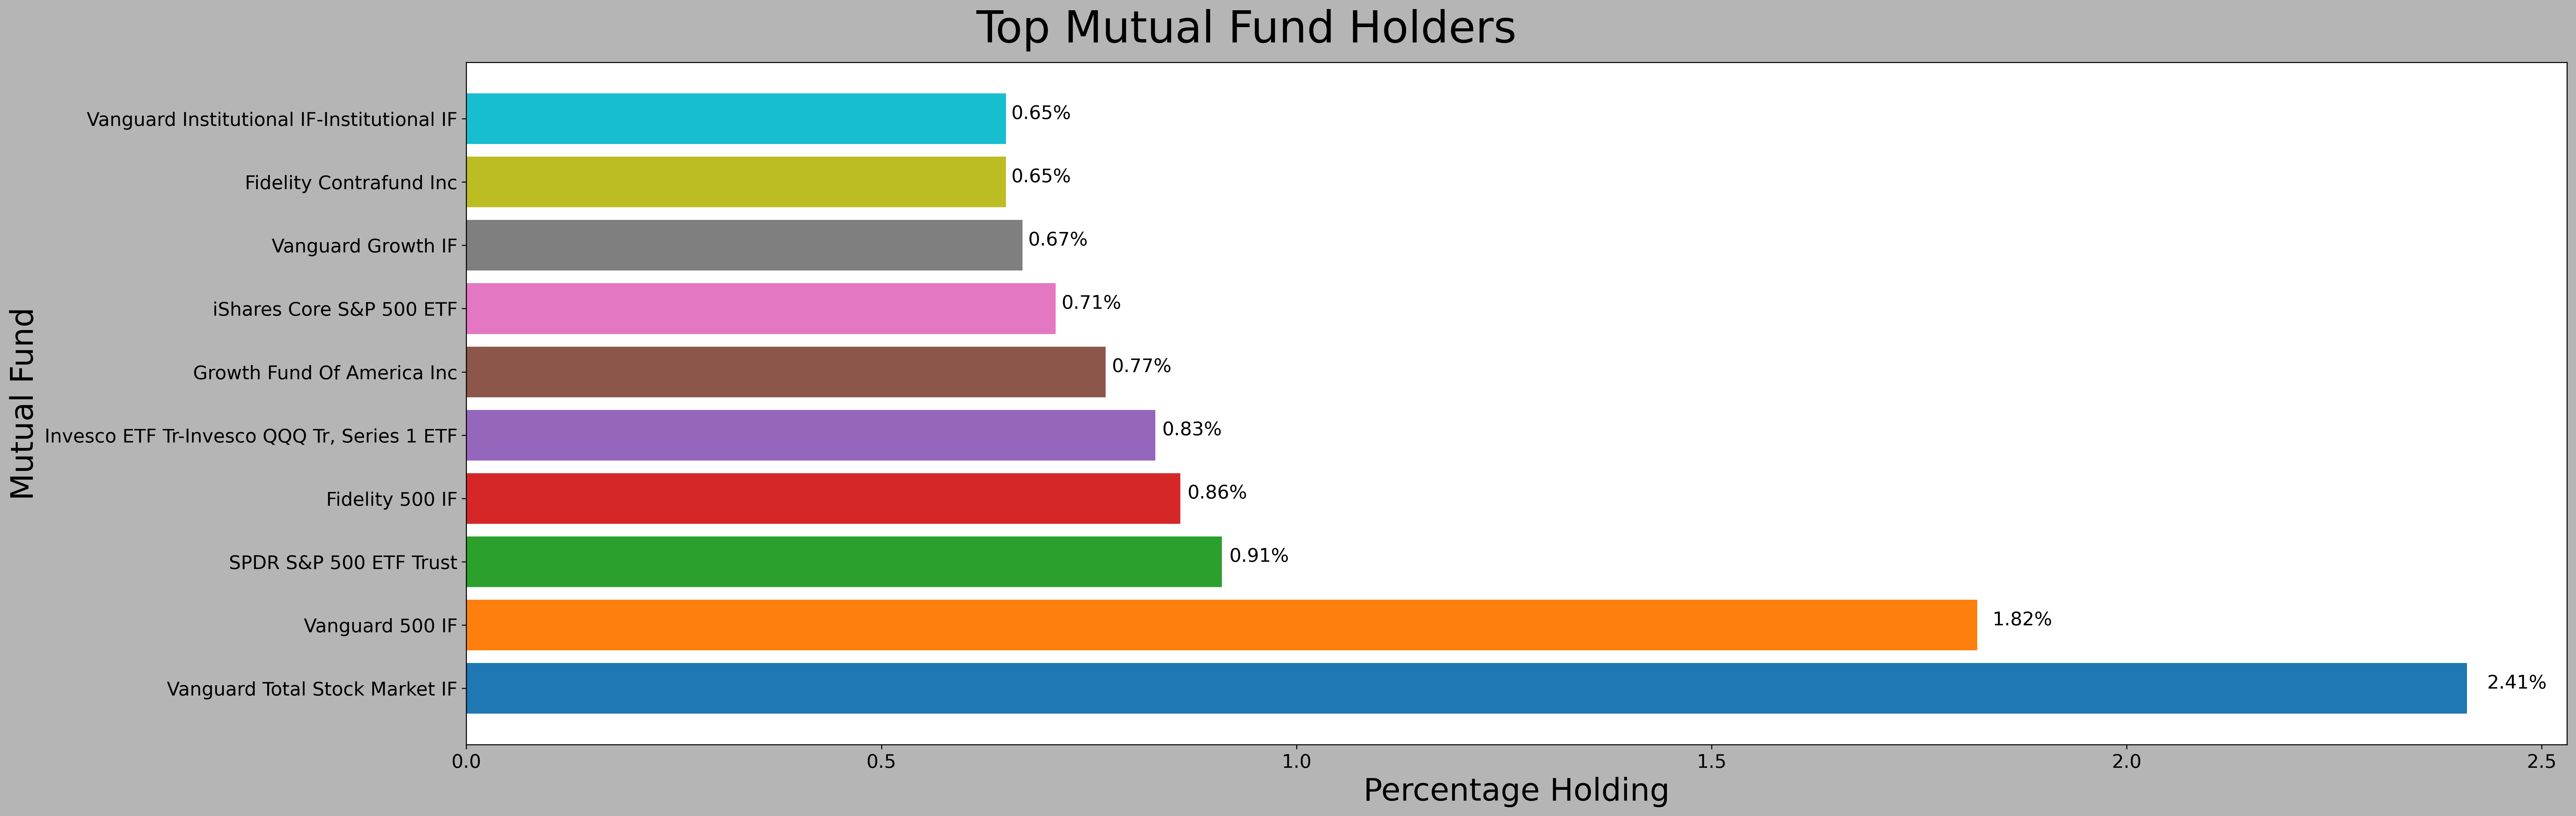

In [588]:
plt.rcParams["figure.figsize"] = (30,10)

x = mutualfund_holders.loc[:, "Holder"].replace("Index Fund", "IF", regex=True).values
y = mutualfund_holders.loc[:, "% Out"].values * 100
fig, ax = plt.subplots()
fig.patch.set_facecolor('#b5b5b5')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for i, value in enumerate(y):
    ax.text(value*1.01, i, f"{value}%", fontsize=15)
plt.title("Top Mutual Fund Holders", size=35, pad=16, horizontalalignment="right")
plt.xlabel("Percentage Holding", size=25)
plt.ylabel("Mutual Fund", size=25)
plt.barh(x, y, color=sns.mpl_palette("tab10", 10))
plt.show()

In [589]:
institutional_holders = amzn.institutional_holders
institutional_holders

Holder    Shares Date Reported   % Out  \
0         Vanguard Group, Inc. (The)  33421754    2021-12-30  0.0657   
1                     Blackrock Inc.  28717802    2021-12-30  0.0564   
2           State Street Corporation  17021616    2021-12-30  0.0335   
3      Price (T.Rowe) Associates Inc  16139535    2021-12-30  0.0317   
4                           FMR, LLC  15576396    2021-12-30  0.0306   
5      Geode Capital Management, LLC   7193360    2021-12-30  0.0141   
6         Northern Trust Corporation   4925881    2021-12-30  0.0097   
7          JP Morgan Chase & Company   4602792    2021-12-30  0.0090   
8  Capital Research Global Investors   4574546    2021-12-30  0.0090   
9                     Morgan Stanley   4247287    2021-12-30  0.0083   

          Value  
0  111439491232  
1   95754915920  
2   56755855093  
3   53814697131  
4   51937000238  
5   23985107982  
6   16424562053  
7   15347273477  
8   15253091709  
9   14161898935

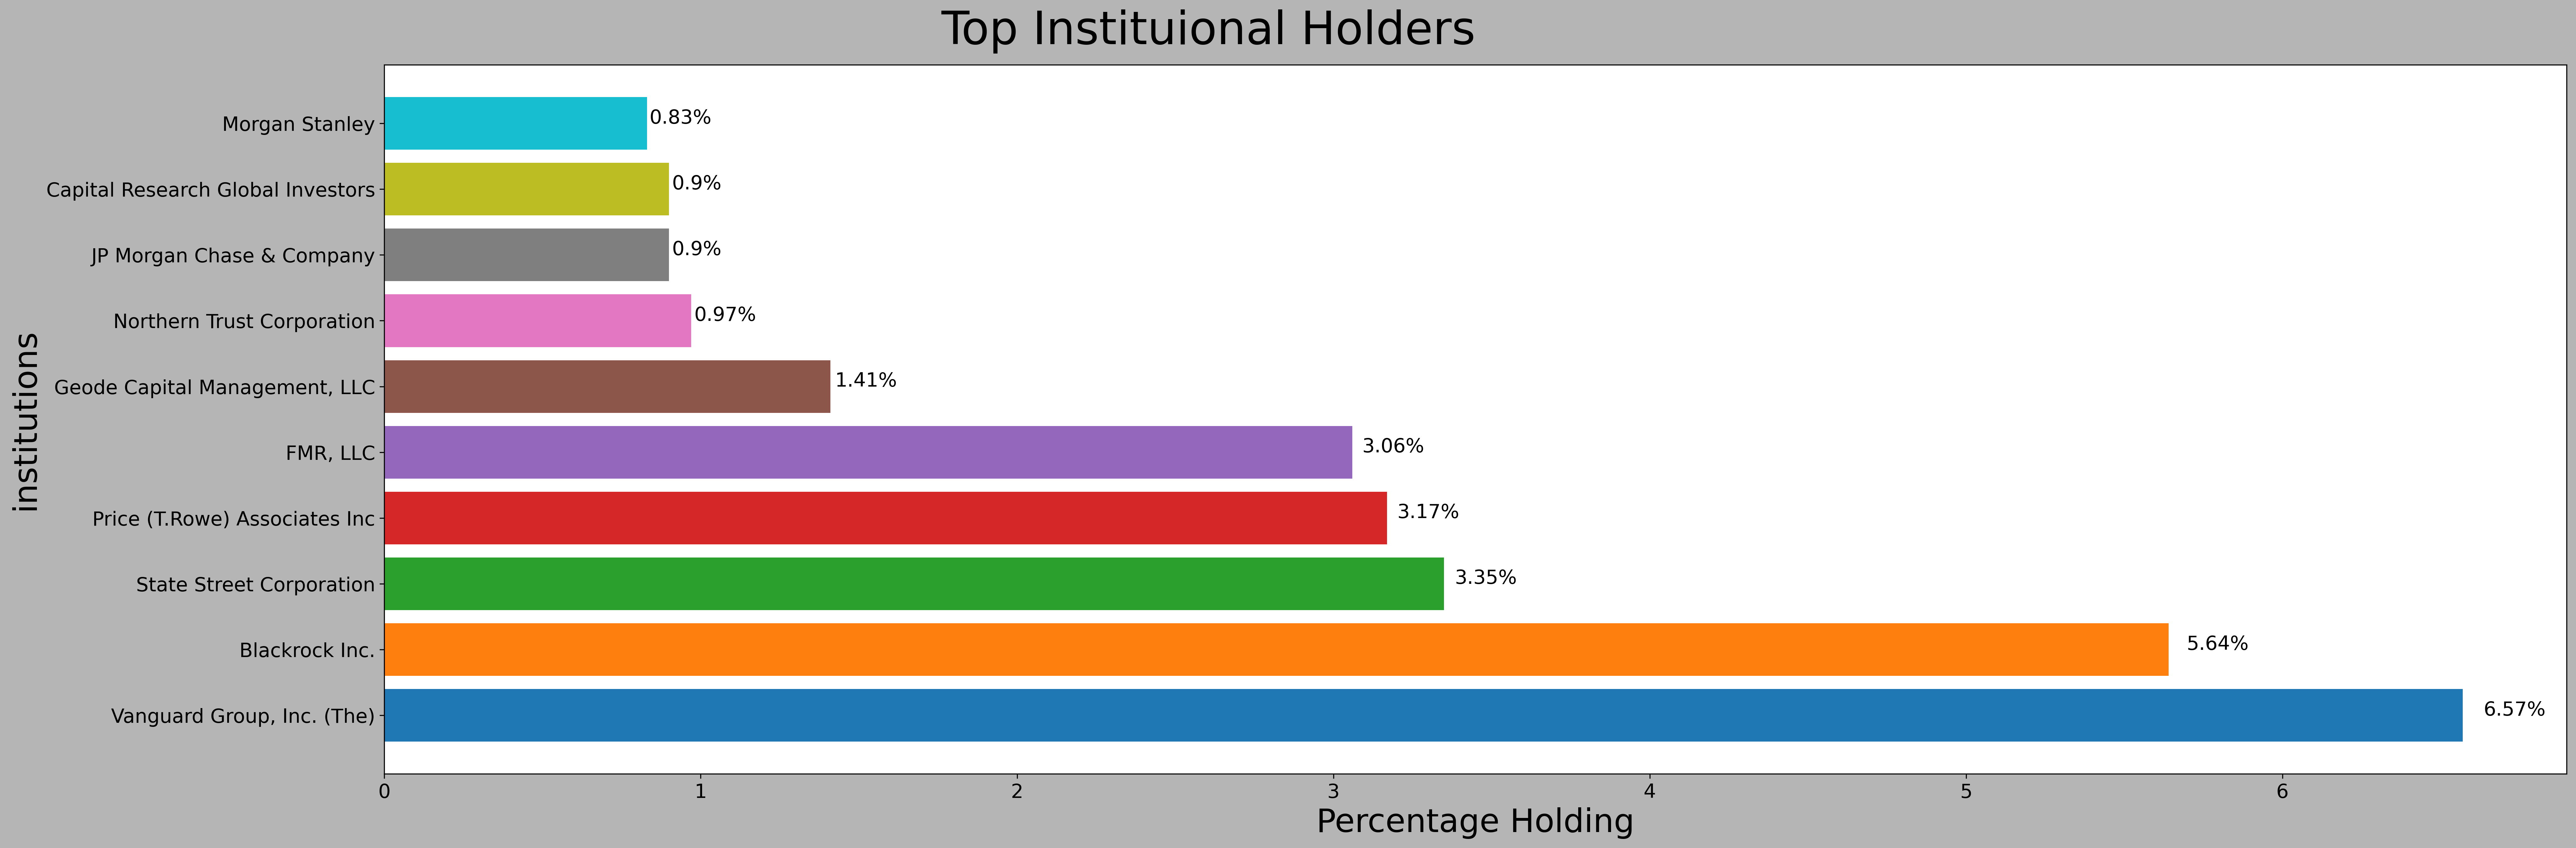

In [590]:
plt.rcParams["figure.figsize"] = (30,10)

x = institutional_holders.loc[:, "Holder"].values
y = institutional_holders.loc[:, "% Out"].values * 100
y = np.around(y, 2)
fig, ax = plt.subplots()
fig.patch.set_facecolor('#b5b5b5')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for i, value in enumerate(y):
    ax.text(value*1.01, i, f"{value}%", fontsize=15)
plt.title("Top Instituional Holders", size=35, pad=16, horizontalalignment="right")
plt.xlabel("Percentage Holding", size=25)
plt.ylabel("institutions", size=25)
plt.barh(x, y, color=sns.mpl_palette("tab10", 10))
plt.show()

In [591]:
earning_dates = (datetime(year=2022, month=2, day=3),
datetime(year=2021, month=10, day=28),
datetime(year=2021, month=7, day=29),
datetime(year=2021, month=4, day=29),
datetime(year=2021, month=2, day=2),
datetime(year=2020, month=10, day=29),
datetime(year=2020, month=7, day=30),
datetime(year=2020, month=4, day=30),
datetime(year=2020, month=1, day=30),
datetime(year=2019, month=10, day=24),
datetime(year=2019, month=4, day=25),
datetime(year=2019, month=7, day=25))
earning_dates

(datetime.datetime(2022, 2, 3, 0, 0),
 datetime.datetime(2021, 10, 28, 0, 0),
 datetime.datetime(2021, 7, 29, 0, 0),
 datetime.datetime(2021, 4, 29, 0, 0),
 datetime.datetime(2021, 2, 2, 0, 0),
 datetime.datetime(2020, 10, 29, 0, 0),
 datetime.datetime(2020, 7, 30, 0, 0),
 datetime.datetime(2020, 4, 30, 0, 0),
 datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2019, 10, 24, 0, 0),
 datetime.datetime(2019, 4, 25, 0, 0),
 datetime.datetime(2019, 7, 25, 0, 0))

In [592]:
date_delta =  timedelta(days=15)
scatter_date_delta = timedelta(days=3)
date_delta, scatter_date_delta

(datetime.timedelta(days=15), datetime.timedelta(days=3))

In [593]:
eps_list = (
(3.57, 27.75),
(8.92, 6.12),
(12.3, 15.12),
(9.54, 15.79),
(7.23, 14.09),
(7.41, 12.37),
(1.46, 10.3),
(6.25, 5.01),
(4.03, 6.47),
(4.62, 4.23),
(5.57, 5.22),
(4.72, 7.09)
)
eps_list

((3.57, 27.75),
 (8.92, 6.12),
 (12.3, 15.12),
 (9.54, 15.79),
 (7.23, 14.09),
 (7.41, 12.37),
 (1.46, 10.3),
 (6.25, 5.01),
 (4.03, 6.47),
 (4.62, 4.23),
 (5.57, 5.22),
 (4.72, 7.09))

In [595]:
historical_data[historical_data["date"] > earning_dates[0] - date_delta]

plt.rcParams["figure.figsize"] = (30,40)

fig, ax = plt.subplots()

fig.patch.set_facecolor('#b5b5b5')

for i, v in enumerate(earning_dates):
    subtracted_date = v - date_delta
    added_date = v + date_delta

    new_df = historical_data[
            (historical_data["date"] > subtracted_date) & 
            (historical_data["date"] < added_date)]

    x = new_df.index
    y = new_df["Open"].values
    ax = plt.subplot(6, 2, i+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.3)

    subtracted_scatter_date = v - scatter_date_delta
    added_scatter_date = v + timedelta(days=4)

    scatter_df = historical_data[
            (historical_data["date"] > subtracted_scatter_date) & 
            (historical_data["date"] <= added_scatter_date)]

    x_scatter = scatter_df.index
    y_scatter = scatter_df["Open"].values

    plt.scatter(x_scatter, y_scatter, color="r", label="Days Before and After", s=75)

    label_str = f"EPS - Estimate: {eps_list[i][0]} - Reported: {eps_list[i][1]}"
    plt.scatter(v, new_df.loc[v,"Open"], color="g", label=label_str, s=75)
    ax.legend(loc="upper left", fontsize=13, shadow=True, borderpad=1)

    start_date = x[0].strftime('%d/%m/%Y')
    end_date = x[-1].strftime('%d/%m/%Y')
    plt.title(f"{start_date} to {end_date}", size=20)
    plt.xlabel("Time", size=20)
    plt.ylabel("Price", size=20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)
    plt.grid()
    plt.plot(x,y)

plt.show()